### Kaggle dataset: https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks

### We begin with importing necessary libraries.

In [17]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import yaml
from fredapi import Fred

### We will use the Federal Reserve API for macroeconomic data to compare it with our S&P 500 data.

In [18]:
# Load the .yaml file
with open('C:\\Users\\blake\\Documents\\github\\math\\finance\\quant\\fred\\fred_api_key.yml', 'r') as file:
    config = yaml.safe_load(file)

# Access the FRED API key from the .yaml file
fred_api_key = config['FRED_API_KEY']

# Initialize the FRED API with the API key
fred = Fred(api_key=fred_api_key)

# Pull data for S&P 500, interest rates, CPI, unemployment, and GDP
sp500_data = fred.get_series('SP500')
interest_rate_data = fred.get_series('FEDFUNDS')
cpi_data = fred.get_series('CPIAUCSL')
unemployment_data = fred.get_series('UNRATE')
gdp_data = fred.get_series('GDP')

# Combine data into a single DataFrame
df_mac = pd.DataFrame({
    'S&P500': sp500_data,
    'Interest_Rate': interest_rate_data,
    'CPI': cpi_data,
    'Unemployment_Rate': unemployment_data,
    'GDP': gdp_data
}).dropna()

# Display the first few rows of the combined data
print(df_mac.head(19))

             S&P500  Interest_Rate      CPI  Unemployment_Rate        GDP
2014-10-01  1946.16           0.09  237.430                5.7  17912.079
2015-04-01  2059.69           0.12  236.222                5.4  18279.784
2015-07-01  2077.42           0.13  238.034                5.2  18401.626
2015-10-01  1923.82           0.12  237.733                5.0  18435.137
2016-04-01  2072.78           0.37  238.992                5.1  18711.702
2016-07-01  2102.95           0.39  240.101                4.8  18892.639
2018-10-01  2924.59           2.19  252.772                3.8  20917.867
2019-04-01  2867.19           2.42  255.233                3.7  21384.775
2019-07-01  2964.33           2.40  255.802                3.7  21694.282
2019-10-01  2940.25           1.83  257.155                3.6  21902.390
2020-04-01  2470.50           0.05  256.126               14.8  19913.143
2020-07-01  3115.86           0.09  258.408               10.2  21647.640
2020-10-01  3380.80           0.09  26

In [19]:
df_mac.head()

,S&P500,Interest_Rate,CPI,Unemployment_Rate,GDP
2014-10-01,1946.16,0.09,237.430,5.7,17912.079
2015-04-01,2059.69,0.12,236.222,5.4,18279.784
2015-07-01,2077.42,0.13,238.034,5.2,18401.626
2015-10-01,1923.82,0.12,237.733,5.0,18435.137
2016-04-01,2072.78,0.37,238.992,5.1,18711.702


In [20]:
# Plotting a scatter matrix with Plotly
fig = px.scatter_matrix(df_mac, dimensions=["S&P500", "Interest_Rate", "CPI", "Unemployment_Rate", "GDP"], title="Scatter Matrix of Economic Indicators")
fig.show()

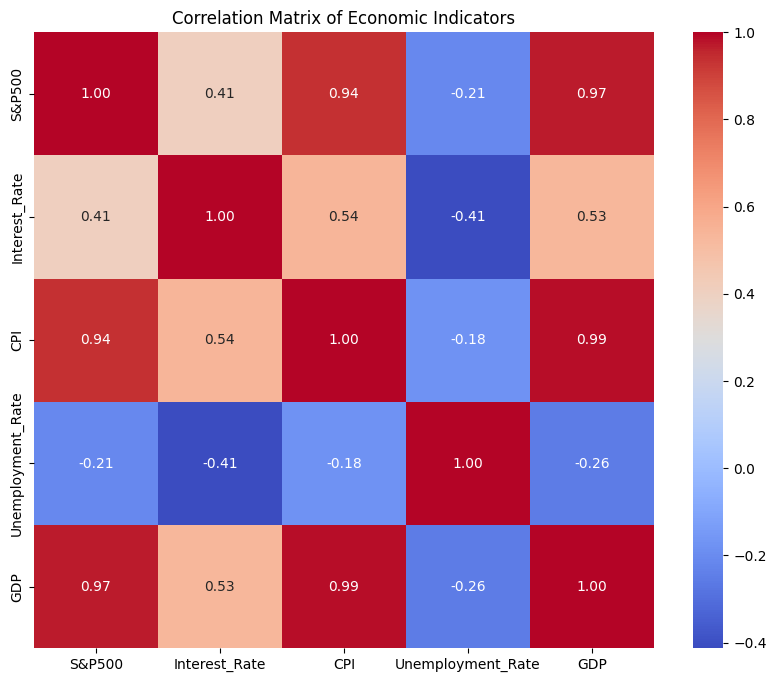

In [21]:
# Plotting the correlation matrix with Seaborn
plt.figure(figsize=(10, 8))
correlation_matrix = df_mac.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Economic Indicators")
plt.show()

### We now load the full S&P 500 data from Kaggle. 

In [22]:
df_comp = pd.read_csv("D:\\datasets\\github_financial_time_series_analysis\\sp500_companies.csv")
df_ind = pd.read_csv("D:\\datasets\\github_financial_time_series_analysis\\sp500_index.csv")
df_stock = pd.read_csv("D:\\datasets\\github_financial_time_series_analysis\\sp500_stocks.csv")

In [23]:
df_comp.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,227.18,3454067277824,1.317810e+11,0.049,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.066196
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,126.46,3110701105152,4.927500e+10,2.621,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059616
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,413.49,3073487667200,1.294330e+11,0.152,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058903
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,166.16,2055565475840,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.039394
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,167.93,2055009599488,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.039384


In [24]:
df_ind.tail()

,Date,S&P500
2530,2024-08-20,5597.12
2531,2024-08-21,5620.85
2532,2024-08-22,5570.64
2533,2024-08-23,5634.61
2534,2024-08-26,5616.84


In [25]:
df_stock.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,46.422302,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,46.131523,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,46.785759,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,46.819294,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,47.149204,70.501671,70.501671,69.648827,69.974915,4073337.0


In [26]:
df_stock.tail()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
1854053,2024-08-20,ZTS,183.600006,183.600006,184.759995,182.899994,184.479996,1186400.0
1854054,2024-08-21,ZTS,182.899994,182.899994,184.529999,181.820007,184.270004,1246800.0
1854055,2024-08-22,ZTS,182.169998,182.169998,184.350006,181.509995,183.410004,1135800.0
1854056,2024-08-23,ZTS,180.899994,180.899994,182.940002,180.179993,182.860001,1247400.0
1854057,2024-08-26,ZTS,181.559998,181.559998,182.589996,180.520096,181.039993,992261.0


In [27]:
# View the columns for each DataFrame
print("Columns in df_comp:", df_comp.columns)
print()
print("Columns in df_ind:", df_ind.columns)
print()
print("Columns in df_stock:", df_stock.columns)

Columns in df_comp: Index(['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')

Columns in df_ind: Index(['Date', 'S&P500'], dtype='object')

Columns in df_stock: Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')


In [28]:
# Find common columns between the DataFrames
common_columns_comp_ind = df_comp.columns.intersection(df_ind.columns)
common_columns_comp_stock = df_comp.columns.intersection(df_stock.columns)
common_columns_ind_stock = df_ind.columns.intersection(df_stock.columns)

print("Common columns between df_comp and df_ind:", common_columns_comp_ind)
print("Common columns between df_comp and df_stock:", common_columns_comp_stock)
print("Common columns between df_ind and df_stock", common_columns_ind_stock)

Common columns between df_comp and df_ind: Index([], dtype='object')
Common columns between df_comp and df_stock: Index(['Symbol'], dtype='object')
Common columns between df_ind and df_stock Index(['Date'], dtype='object')


In [29]:
print(f"df_comp rows: {len(df_comp)}")
print(f"df_ind rows: {len(df_ind):,.0f}")
print(f"df_stock rows: {len(df_stock):,.0f}")
print()
total_len = len(df_comp) + len(df_ind) + len(df_stock)
print(f"{total_len:,.0f} total rows in all 3 datasets")

df_comp rows: 503
df_ind rows: 2,535
df_stock rows: 1,854,058

1,857,096 total rows in all 3 datasets


In [30]:
# Step 1: Join df2 (sp500_index.csv) and df3 (sp500_stocks.csv) on the 'Date' column
merged_df1 = pd.merge(df_ind, df_stock, on='Date', how='outer')
merged_df1.head()
len(merged_df1)

1854058

In [31]:
merged_df1.head(25)

,Date,S&P500,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,NaN,MMM,46.422302,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-04,NaN,AOS,5.963979,7.435000,7.480000,7.261667,7.295000,1104600.0
2,2010-01-04,NaN,ABT,18.852146,26.129908,26.177889,25.870815,26.000362,10829095.0
3,2010-01-04,NaN,ABBV,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-04,NaN,ACN,32.970871,42.070000,42.200001,41.500000,41.520000,3650100.0
5,2010-01-04,NaN,ADBE,37.090000,37.090000,37.299999,36.650002,36.650002,4710200.0
6,2010-01-04,NaN,AMD,9.700000,9.700000,9.900000,9.680000,9.790000,18748700.0
7,2010-01-04,NaN,AES,9.469491,13.670000,13.700000,13.380000,13.380000,4597600.0
8,2010-01-04,NaN,AFL,16.566839,23.785000,23.850000,23.250000,23.250000,4724000.0
9,2010-01-04,NaN,A,20.084955,22.389128,22.625179,22.267525,22.453505,3815561.0


In [32]:
# Step 2: Join the resulting dataframe with df1 (sp500_companies.csv) on the 'Symbol' column
df = pd.merge(merged_df1, df_comp, on='Symbol', how='outer')
df.head()

,Date,S&P500,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,2010-01-04,NaN,A,20.084955,22.389128,22.625179,22.267525,22.453505,3815561.0,NYQ,...,140.49,40395087872,1.794000e+09,-0.056,Santa Clara,CA,United States,18000.0,"Agilent Technologies, Inc. provides applicatio...",0.000774
1,2010-01-05,NaN,A,19.866772,22.145924,22.331903,22.002861,22.324751,4186031.0,NYQ,...,140.49,40395087872,1.794000e+09,-0.056,Santa Clara,CA,United States,18000.0,"Agilent Technologies, Inc. provides applicatio...",0.000774
2,2010-01-06,NaN,A,19.796192,22.067240,22.174536,22.002861,22.067240,3243779.0,NYQ,...,140.49,40395087872,1.794000e+09,-0.056,Santa Clara,CA,United States,18000.0,"Agilent Technologies, Inc. provides applicatio...",0.000774
3,2010-01-07,NaN,A,19.770525,22.038628,22.045780,21.816881,22.017166,3095172.0,NYQ,...,140.49,40395087872,1.794000e+09,-0.056,Santa Clara,CA,United States,18000.0,"Agilent Technologies, Inc. provides applicatio...",0.000774
4,2010-01-08,NaN,A,19.764101,22.031473,22.067240,21.745352,21.917025,3733918.0,NYQ,...,140.49,40395087872,1.794000e+09,-0.056,Santa Clara,CA,United States,18000.0,"Agilent Technologies, Inc. provides applicatio...",0.000774


In [33]:
len(df_stock)

1854058

In [34]:
# set date as index column for time-series analysis
print(type(df_stock['Date']))
df_stock['Date'] = pd.to_datetime(df_stock['Date'])  # Convert the Date column to datetime

<class 'pandas.core.series.Series'>


In [35]:
# Set Date as the index
df_stock.set_index('Date', inplace=True)

In [36]:
# Sort by the index to ensure time series operations are correct
df.sort_index(inplace=True)

In [37]:
%store df

Stored 'df' (DataFrame)


### All three datasets have been merged into one.  Let's begin the analysis.

### Feature engineering/adding columns for datasets

In [38]:
# Calculate daily returns using the 'Adj Close' column
df['Return'] = df['Adj Close'].pct_change(fill_method = None) * 100 # Calculate daily returns as percentage
df_stock['Return'] = df_stock['Adj Close'].pct_change(fill_method = None) * 100 # Calculate daily returns as percentage

In [39]:
df_stock.head()

,Symbol,Adj Close,Close,High,Low,Open,Volume,Return
Date,,,,,,,,
2010-01-04,MMM,46.422302,69.414719,69.774246,69.122070,69.473244,3640265.0,NaN
2010-01-05,MMM,46.131523,68.979935,69.590302,68.311035,69.230766,3405012.0,-0.626378
2010-01-06,MMM,46.785759,69.958191,70.735786,69.824417,70.133781,6301126.0,1.418197
2010-01-07,MMM,46.819294,70.008362,70.033447,68.662209,69.665550,5346240.0,0.071678
2010-01-08,MMM,47.149204,70.501671,70.501671,69.648827,69.974915,4073337.0,0.704646


In [40]:
# Calculate absolute returns as the change in 'Adj Close' from one day to the next
df_stock['Absolute_Return'] = df_stock['Adj Close'].diff()
df['Absolute_Return'] = df['Adj Close'].diff()

In [41]:
# Simple Moving Average (SMA) - 20-day and 200-day
df_stock['SMA_20'] = df_stock['Adj Close'].rolling(window=20).mean()
df_stock['SMA_200'] = df_stock['Adj Close'].rolling(window=200).mean()

df['SMA_20'] = df['Adj Close'].rolling(window=20).mean()
df['SMA_200'] = df['Adj Close'].rolling(window=200).mean()

In [42]:
df_stock.tail()

,Symbol,Adj Close,Close,High,Low,Open,Volume,Return,Absolute_Return,SMA_20,SMA_200
Date,,,,,,,,,,,
2024-08-20,ZTS,183.600006,183.600006,184.759995,182.899994,184.479996,1186400.0,-0.477011,-0.879990,182.842001,177.674338
2024-08-21,ZTS,182.899994,182.899994,184.529999,181.820007,184.270004,1246800.0,-0.381270,-0.700012,183.004000,177.790291
2024-08-22,ZTS,182.169998,182.169998,184.350006,181.509995,183.410004,1135800.0,-0.399123,-0.729996,183.074500,177.896042
2024-08-23,ZTS,180.899994,180.899994,182.940002,180.179993,182.860001,1247400.0,-0.697153,-1.270004,183.127500,177.990779
2024-08-26,ZTS,181.559998,181.559998,182.589996,180.520096,181.039993,992261.0,0.364844,0.660004,183.114000,178.069015


In [43]:
# Exponential Moving Average (EMA) - 20-day and 200-day
df_stock['EMA_20'] = df_stock['Adj Close'].ewm(span=20, adjust=False).mean()
df_stock['EMA_200'] = df_stock['Adj Close'].ewm(span=200, adjust=False).mean()

df['EMA_20'] = df['Adj Close'].ewm(span=20, adjust=False).mean()
df['EMA_200'] = df['Adj Close'].ewm(span=200, adjust=False).mean()

In [44]:
# 3. Relative Strength Index (RSI) - 14-day period
window_length = 14

In [45]:
# Calculate the daily price changes
delta = df['Adj Close'].diff()

In [46]:
# Calculate the gains and losses
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()

In [47]:
# Calculate the RS and RSI
rs = gain / loss
df['RSI_14'] = 100 - (100 / (1 + rs))

In [48]:
# 4. Bollinger Bands (20-day SMA and 2 standard deviations)
df['Bollinger_Mid'] = df['Adj Close'].rolling(window=20).mean()
df['Bollinger_Upper'] = df['Bollinger_Mid'] + 2 * df['Adj Close'].rolling(window=20).std()
df['Bollinger_Lower'] = df['Bollinger_Mid'] - 2 * df['Adj Close'].rolling(window=20).std()

In [49]:
# 5. MACD (12-day EMA and 26-day EMA)
ema_12 = df['Adj Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Adj Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['MACD_Histogram'] = df['MACD'] - df['MACD_Signal']

In [50]:
(df['Return'] < -1).value_counts()

Return
False    1482095
True      371963
Name: count, dtype: int64

### Fix cumulative returns

In [51]:
# 7. Daily Log Returns
df['Log_Return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))

In [52]:
# 8. Volatility (30-day rolling standard deviation of returns)
df['Volatility'] = df['Return'].rolling(window=30).std()

In [53]:
# 9. Sharpe Ratio (using a risk-free rate assumption, e.g., 0)
# If you want to use a risk-free rate, adjust accordingly
risk_free_rate = 0
df['Excess_Return'] = df['Return'] - risk_free_rate
df['Sharpe_Ratio'] = df['Excess_Return'].rolling(window=30).mean() / df['Volatility']

In [54]:
df.tail(2)

,Date,S&P500,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,...,Bollinger_Mid,Bollinger_Upper,Bollinger_Lower,MACD,MACD_Signal,MACD_Histogram,Log_Return,Volatility,Excess_Return,Sharpe_Ratio
1854056,2024-08-23,5634.61,ZTS,180.899994,180.899994,182.940002,180.179993,182.860001,1247400.0,NYQ,...,183.1275,189.018357,177.236644,1.124275,1.779972,-0.655698,-0.006996,1.715324,-0.697153,0.032877
1854057,2024-08-26,5616.84,ZTS,181.559998,181.559998,182.589996,180.520096,181.039993,992261.0,NYQ,...,183.1140,189.018598,177.209402,0.923628,1.608704,-0.685075,0.003642,1.711743,0.364844,0.051580


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854058 entries, 0 to 1854057
Data columns (total 41 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Date                 object 
 1   S&P500               float64
 2   Symbol               object 
 3   Adj Close            float64
 4   Close                float64
 5   High                 float64
 6   Low                  float64
 7   Open                 float64
 8   Volume               float64
 9   Exchange             object 
 10  Shortname            object 
 11  Longname             object 
 12  Sector               object 
 13  Industry             object 
 14  Currentprice         float64
 15  Marketcap            int64  
 16  Ebitda               float64
 17  Revenuegrowth        float64
 18  City                 object 
 19  State                object 
 20  Country              object 
 21  Fulltimeemployees    float64
 22  Longbusinesssummary  object 
 23  Weight               float64
 24

In [56]:
df.describe()

,S&P500,Adj Close,Close,High,Low,Open,Volume,Currentprice,Marketcap,Ebitda,...,Bollinger_Mid,Bollinger_Upper,Bollinger_Lower,MACD,MACD_Signal,MACD_Histogram,Log_Return,Volatility,Excess_Return,Sharpe_Ratio
count,1.275105e+06,1.755493e+06,1.755493e+06,1.755493e+06,1.755493e+06,1.755493e+06,1.755493e+06,1.854058e+06,1.854058e+06,1.747164e+06,...,1.754106e+06,1.754106e+06,1.754106e+06,1.854058e+06,1.854058e+06,1.854058e+06,1.755420e+06,1.753303e+06,1.755420e+06,1.753195e+06
mean,3.212884e+03,9.681512e+01,1.037878e+02,1.049239e+02,1.025960e+02,1.037680e+02,6.977021e+06,2.192332e+02,1.037360e+11,6.768586e+09,...,9.676185e+01,1.030039e+02,9.051984e+01,2.566928e-01,2.566894e-01,3.470665e-06,6.943955e-05,1.818604e+00,5.476208e-02,5.517196e-02
std,1.004993e+03,2.064187e+02,2.063995e+02,2.088036e+02,2.039171e+02,2.063110e+02,3.320514e+07,4.944918e+02,3.074912e+11,1.475841e+10,...,2.050821e+02,2.185823e+02,1.938119e+02,8.948339e+00,8.592071e+00,2.235904e+00,3.969302e-02,1.542855e+00,2.381355e+00,1.777540e-01
min,1.829080e+03,2.036243e-01,2.220000e-01,2.262500e-01,2.162500e-01,2.180000e-01,0.000000e+00,8.230000e+00,6.329720e+09,-4.107000e+09,...,2.154451e-01,2.308531e-01,-2.367027e+03,-1.016704e+03,-8.931484e+02,-4.275677e+02,-5.871614e+00,0.000000e+00,-9.971817e+01,-8.195794e-01
25%,2.294670e+03,2.913824e+01,3.484000e+01,3.522000e+01,3.444000e+01,3.483000e+01,1.003500e+06,6.793000e+01,1.917482e+10,1.594898e+09,...,2.926513e+01,3.096313e+01,2.729633e+01,-3.514011e-01,-3.235034e-01,-1.446244e-01,-8.085010e-03,1.119989e+00,-8.052414e-01,-6.935438e-02
50%,2.907970e+03,5.409750e+01,6.227230e+01,6.290000e+01,6.160000e+01,6.226000e+01,2.185800e+06,1.227400e+02,3.612770e+10,2.880500e+09,...,5.419004e+01,5.722870e+01,5.095328e+01,1.757633e-01,1.734789e-01,8.881784e-16,7.592974e-04,1.495664e+00,7.595858e-02,5.497485e-02
75%,4.123340e+03,1.031100e+02,1.126223e+02,1.137900e+02,1.114000e+02,1.126100e+02,5.008700e+06,2.316500e+02,7.487744e+10,5.888083e+09,...,1.031330e+02,1.092726e+02,9.704935e+01,8.683101e-01,8.308617e-01,1.654128e-01,9.500536e-03,2.049485e+00,9.545809e-01,1.774040e-01
max,5.667200e+03,9.321270e+03,9.321270e+03,9.359380e+03,9.125470e+03,9.325000e+03,3.692928e+09,9.153110e+03,3.454067e+12,1.317810e+11,...,8.656778e+03,9.212471e+03,8.273796e+03,2.632760e+02,2.362671e+02,1.325429e+02,1.729092e+00,8.474559e+01,4.635537e+02,1.020586e+00


In [57]:
df.columns

Index(['Date', 'S&P500', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume', 'Exchange', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight',
       'Return', 'Absolute_Return', 'SMA_20', 'SMA_200', 'EMA_20', 'EMA_200',
       'RSI_14', 'Bollinger_Mid', 'Bollinger_Upper', 'Bollinger_Lower', 'MACD',
       'MACD_Signal', 'MACD_Histogram', 'Log_Return', 'Volatility',
       'Excess_Return', 'Sharpe_Ratio'],
      dtype='object')

### Trend Analysis

#### How do stock prices evolve over time, and what are the long-term trends?

In [60]:
# Plot the raw time series data using Plotly (one stock, one date range)
stock = 'AAPL'
start_date = '2024-01-01'
end_date = '2024-08-22'

df_filtered = df[(df['Symbol'] == stock) & (df.index >= start_date) & (df.index <= end_date)].copy()

# Use .loc to set the rolling average to avoid the warning
df_filtered.loc[:, 'Rolling_Avg'] = df_filtered['Close'].rolling(window=30).mean()  # 30-day rolling average

fig = px.line(df_filtered, x=df_filtered.index, y='Close', title=f'{stock} Stock Price, {start_date} to {end_date}', labels={'Close':'Stock Price'})

# Add a rolling average line
fig.add_scatter(x=df_filtered.index, y=df_filtered['Rolling_Avg'], mode='lines', name='30-Day Rolling Average')

fig.show()

TypeError: Invalid comparison between dtype=int64 and str

### Reference Stock List

In [61]:
stock_symbols = df['Symbol'].unique()  

# Convert to list (optional)
stock_symbols_list = sorted(stock_symbols.tolist())

# Display the full list of stock symbols
print(stock_symbols_list)

['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF-B', 'BG', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY', 'BR', 'BRK-B', 'BRO', 'BSX', 'BWA', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CEG', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COR', 'COST', 'CPAY', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CRWD', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DAY', 'DD', 'DE', 'DECK', 'DFS', 'DG', 'DGX', 'DHI', 'DHR'

In [45]:
# Calculate the 20-day rolling mean (middle Bollinger band)
df_filtered['Rolling_Mean'] = df_filtered['Close'].rolling(window=20).mean()

# Calculate the rolling standard deviation
df_filtered['Rolling_Std'] = df_filtered['Close'].rolling(window=20).std()

# Calculate the upper and lower Bollinger Bands (2 standard deviations away from the moving average)
df_filtered['Upper_Band'] = df_filtered['Rolling_Mean'] + (df_filtered['Rolling_Std'] * 2)
df_filtered['Lower_Band'] = df_filtered['Rolling_Mean'] - (df_filtered['Rolling_Std'] * 2)

# Plot the filtered data with the Bollinger Bands using Plotly
fig = go.Figure()

# Add the original stock price line
fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['Close'], mode='lines', name='Stock Price', line=dict(color='blue')))

# Add the Rolling Mean (middle Bollinger band)
fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['Rolling_Mean'], mode='lines', name='20-Day Moving Average', line=dict(color='orange')))

# Add the Upper Bollinger Band
fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['Upper_Band'], mode='lines', name='Upper Bollinger Band', line=dict(color='green', dash='dash')))

# Add the Lower Bollinger Band
fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['Lower_Band'], mode='lines', name='Lower Bollinger Band', line=dict(color='red', dash='dash')))

# Fill the area between the upper and lower bands for better visualization
fig.add_trace(go.Scatter(
    x=df_filtered.index, y=df_filtered['Upper_Band'],
    mode='lines', line=dict(width=0), showlegend=False
))

fig.add_trace(go.Scatter(
    x=df_filtered.index, y=df_filtered['Lower_Band'],
    fill='tonexty', fillcolor='rgba(173,216,230,0.3)', 
    mode='lines', line=dict(width=0), showlegend=False
))

# Customize the layout of the plot
fig.update_layout(
    title=f'Stock Price of {stock} with Bollinger Bands from {start_date} to {end_date}',
    xaxis_title='Date',
    yaxis_title='Stock Price'
)

fig.show()

In [46]:
df.head(2)

,S&P500,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Bollinger_Mid,Bollinger_Upper,Bollinger_Lower,MACD,MACD_Signal,MACD_Histogram,Log_Return,Volatility,Excess_Return,Sharpe_Ratio
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,A,20.084953,22.389128,22.625179,22.267525,22.453505,3815561.0,NYQ,"Agilent Technologies, Inc.",...,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2010-01-04,NaN,COP,23.929371,40.082603,40.158836,39.282173,39.465130,13880848.0,NYQ,ConocoPhillips,...,NaN,NaN,NaN,0.306677,0.061335,0.245342,0.175136,NaN,19.140784,NaN


### How does stock market volatility behave, and how can we model it?

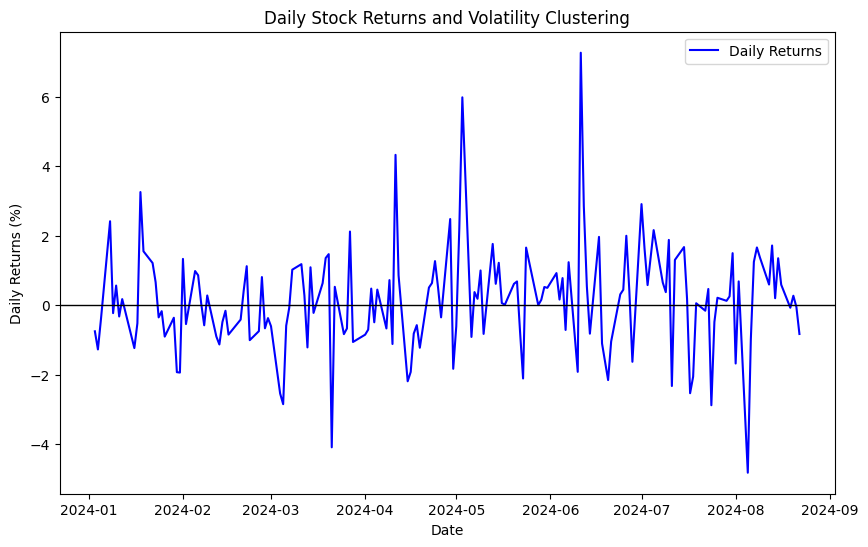

In [47]:
# Assuming df is already filtered to the specific stock and date range, and set with 'Date' as the index
df_filtered['Returns'] = df_filtered['Close'].pct_change() * 100  # Calculate daily returns as percentage

# Plot the daily returns to visualize volatility clustering
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, df_filtered['Returns'], color='blue', label='Daily Returns')
plt.title('Daily Stock Returns and Volatility Clustering')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.axhline(0, color='black', lw=1)
plt.legend()
plt.show()

In [48]:
# Create a Plotly figure for daily returns
fig = go.Figure()

# Add daily returns as a line plot
fig.add_trace(go.Scatter(x=df_filtered.index, y=df_filtered['Returns'], mode='lines', name='Daily Returns', line=dict(color='blue')))

# Add a horizontal line at 0 for reference
fig.add_shape(type="line", x0=df_filtered.index.min(), y0=0, x1=df_filtered.index.max(), y1=0, line=dict(color="black", width=2))

# Update the layout for better aesthetics
fig.update_layout(
    title="Daily Stock Returns and Volatility Clustering",
    xaxis_title="Date",
    yaxis_title="Daily Returns (%)",
    showlegend=True,
    template="plotly_white"
)

fig.show()

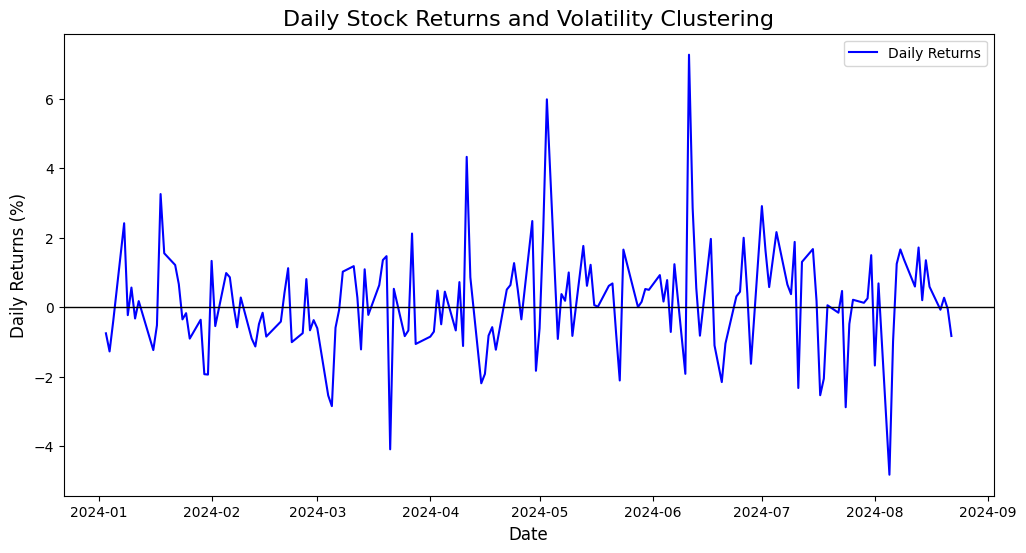

In [49]:
# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x=df_filtered.index, y='Returns', label='Daily Returns', color='blue')

# Add a horizontal line at 0 for reference
plt.axhline(0, color='black', linewidth=1)

# Add titles and labels
plt.title('Daily Stock Returns and Volatility Clustering', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Returns (%)', fontsize=12)
plt.legend()
plt.show()

In [50]:
# Rescale the returns (e.g., divide by 1000) for GARCH just in case
df['Rescaled_Returns'] = df['Return'] / 1000

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4788.815735179257
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1132.8396862337127
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1139.9786179048406
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1132.7119281515152
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1132.7018242228955
Iteration:      6,   Func. Count:     35,   Neg. LLF: 1132.701652243824
Iteration:      7,   Func. Count:     40,   Neg. LLF: 1132.7016426715702
Iteration:      8,   Func. Count:     45,   Neg. LLF: 1132.7015886936592
Iteration:      9,   Func. Count:     50,   Neg. LLF: 1132.7013238636393
Iteration:     10,   Func. Count:     55,   Neg. LLF: 1132.7001488093451
Iteration:     11,   Func. Count:     60,   Neg. LLF: 1132.6973237282423
Iteration:     12,   Func. Count:     65,   Neg. LLF: 1132.6971375351113
Iteration:     13,   Func. Count:     70,   Neg. LLF: 1132.6971230734976
Iteration:     14,   Func. Count:     75,   Neg. LLF:

C:\Users\blake\Documents\github\finance_time_series\venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.277e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




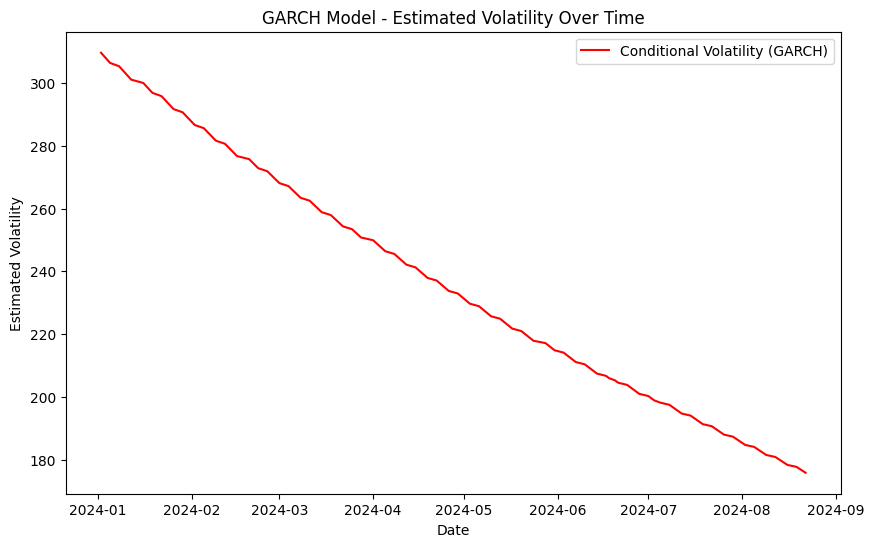

In [51]:
from arch import arch_model

# Drop NaN values in the returns (since pct_change creates NaNs for the first row)
df_filtered.dropna(subset=['Return'], inplace=True)

# Fit a GARCH(1,1) model to the daily returns
model = arch_model(df_filtered['Return'], vol='Garch', p=1, q=1)
garch_fit = model.fit()

# Print the summary of the GARCH model fit
print(garch_fit.summary())

# Plot the conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, garch_fit.conditional_volatility, color='red', label='Conditional Volatility (GARCH)')
plt.title('GARCH Model - Estimated Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Volatility')
plt.legend()
plt.show()

### Are there seasonal patterns in stock returns (e.g., monthly effects, day-of-the-week effects)?

                                     SARIMAX Results                                     
Dep. Variable:                            Return   No. Observations:                  234
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1107.551
Date:                           Fri, 23 Aug 2024   AIC                           2225.103
Time:                                   13:25:16   BIC                           2242.205
Sample:                               01-02-2024   HQIC                          2232.005
                                    - 08-22-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0009      0.108     -0.008      0.993      -0.213       0.212
ma.L1         -1.0000      3.330     -0.300

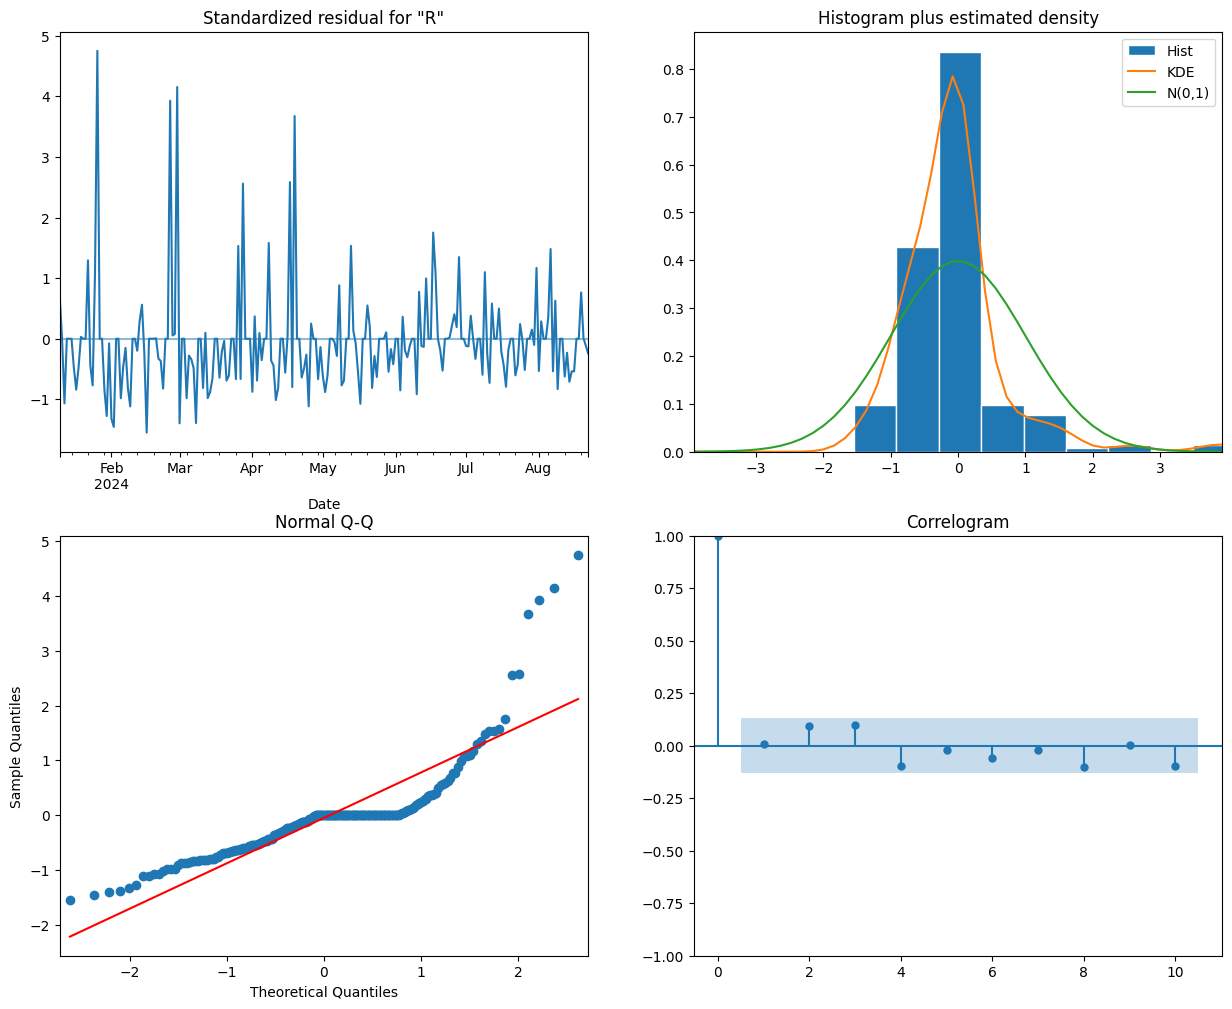

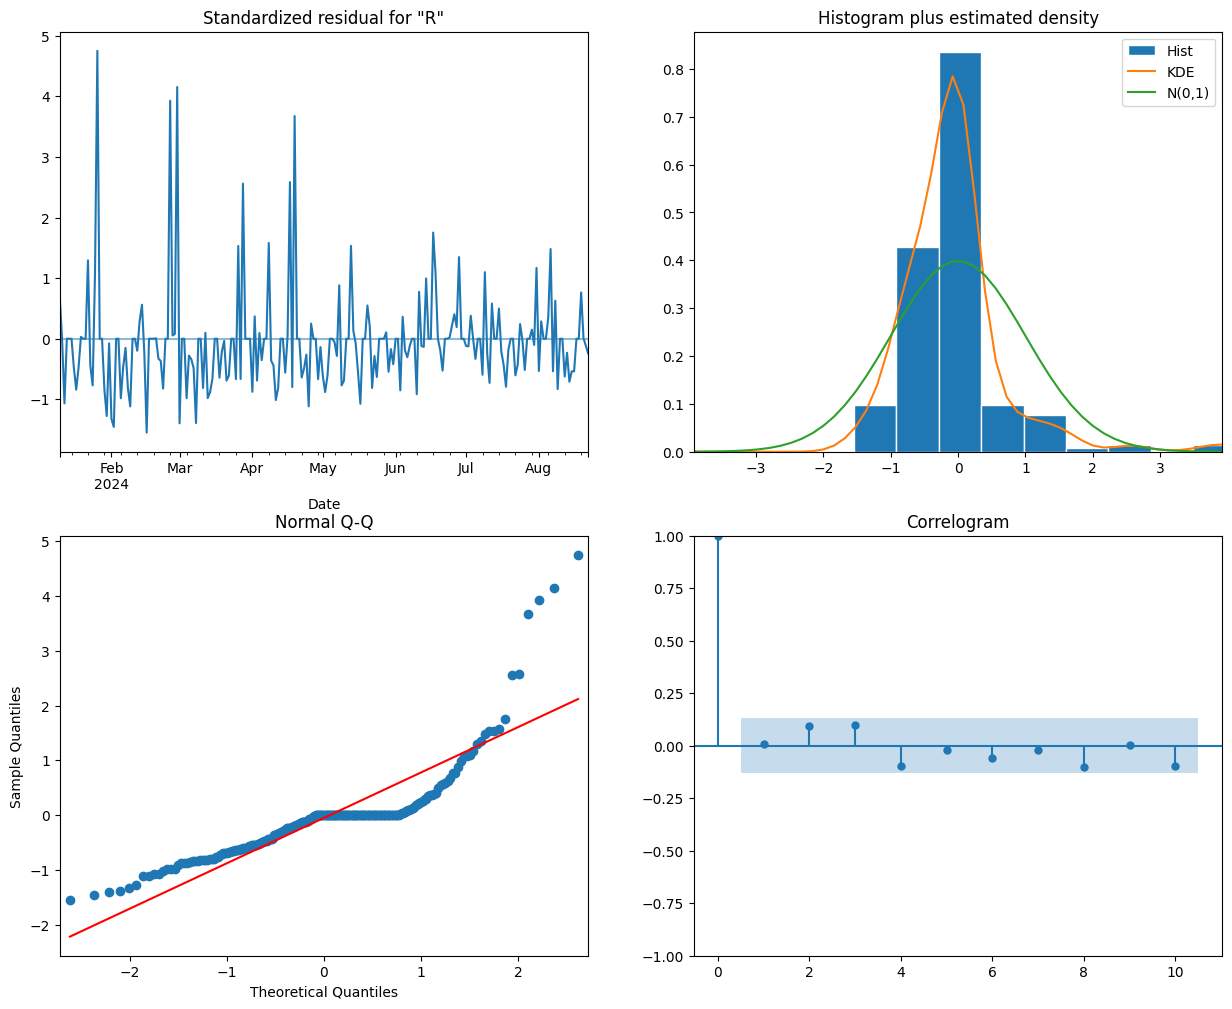

In [52]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

start_date = '2024-01-01'
end_date = '2024-12-31'

df_filtered = df_filtered.loc[start_date:end_date]

# set frequency automatically (can do a manual "frequency = 'D'"" if needed)
df_filtered = df_filtered.asfreq(pd.infer_freq(df_filtered.index))

# SARIMA modeling: assuming we want to check for weekly seasonality (7 days)
model = SARIMAX(df_filtered['Return'], order=(1,1,1), seasonal_order=(1,1,1,7))
sarima_result = model.fit()

# Summary of SARIMA model
print(sarima_result.summary())

# Plotting diagnostics
sarima_result.plot_diagnostics(figsize=(15, 12))

### How strongly correlated are stock prices with macroeconomic indicators like interest rates or inflation?

In [53]:
df_mac.head()

,S&P500,Interest_Rate,CPI,Unemployment_Rate,GDP
2014-10-01,1946.16,0.09,237.430,5.7,17912.079
2015-04-01,2059.69,0.12,236.222,5.4,18279.784
2015-07-01,2077.42,0.13,238.034,5.2,18401.626
2015-10-01,1923.82,0.12,237.733,5.0,18435.137
2016-04-01,2072.78,0.37,238.992,5.1,18711.702


In [54]:
df.head()

,S&P500,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Bollinger_Upper,Bollinger_Lower,MACD,MACD_Signal,MACD_Histogram,Log_Return,Volatility,Excess_Return,Sharpe_Ratio,Rescaled_Returns
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,A,20.084953,22.389128,22.625179,22.267525,22.453505,3815561.0,NYQ,"Agilent Technologies, Inc.",...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,COP,23.929371,40.082603,40.158836,39.282173,39.465130,13880848.0,NYQ,ConocoPhillips,...,NaN,NaN,0.306677,0.061335,0.245342,0.175136,NaN,19.140784,NaN,0.019141
2010-01-04,NaN,EXR,7.290416,11.890000,11.910000,11.600000,11.750000,774400.0,NYQ,Extra Space Storage Inc,...,NaN,NaN,-0.783868,-0.107705,-0.676162,-1.188546,NaN,-69.533607,NaN,-0.069534
2010-01-04,NaN,MS,22.652843,30.910000,31.969999,30.629999,30.700001,20371000.0,NYQ,Morgan Stanley,...,NaN,NaN,-0.403857,-0.166936,-0.236922,1.133725,NaN,210.720852,NaN,0.210721
2010-01-04,NaN,HD,20.287861,28.670000,29.150000,28.549999,29.150000,13120900.0,NYQ,"Home Depot, Inc. (The)",...,NaN,NaN,-0.290186,-0.191586,-0.098600,-0.110263,NaN,-10.440114,NaN,-0.010440


### For this question, I resample Stock Prices to Monthly Frequency.
### Convert your daily stock data into monthly data by aggregating it (e.g., using the last trading day of each month).

In [55]:
# Resample the daily stock data to monthly frequency, using the last available stock price of each month
sp500_monthly = df.resample('ME').last()

In [56]:
sp500_monthly.head()

,S&P500,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Bollinger_Upper,Bollinger_Lower,MACD,MACD_Signal,MACD_Histogram,Log_Return,Volatility,Excess_Return,Sharpe_Ratio,Rescaled_Returns
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,NaN,LKQ,8.774674,9.375000,9.555000,9.325000,9.500000,1096400.0,NMS,LKQ Corporation,...,44.775788,-0.919810,-2.685094,-2.305528,-0.379566,-0.217222,179.762977,-19.524903,0.351985,-0.019525
2010-02-28,NaN,CRL,37.919998,37.919998,38.090000,37.610001,37.750000,505800.0,NYQ,Charles River Laboratories Inte,...,76.820525,-24.561034,-2.726595,-2.902996,0.176401,3.374798,129.877715,2821.838237,0.259889,2.821838
2010-03-31,NaN,ODFL,4.802124,4.946667,5.010370,4.871111,4.931852,2214000.0,NMS,"Old Dominion Freight Line, Inc.",...,66.437149,-14.896103,-7.697324,-6.175345,-1.521978,-1.273212,188.914666,-72.006891,0.309874,-0.072007
2010-04-30,NaN,IPG,5.814480,8.910000,9.560000,8.860000,9.530000,11853500.0,NYQ,"Interpublic Group of Companies,",...,56.956447,-6.942880,-3.273383,-0.804839,-2.468545,-0.775282,365.221578,-53.942599,0.294768,-0.053943
2010-05-31,NaN,XOM,35.081463,60.459999,61.669998,60.279999,61.209999,32078700.0,NYQ,Exxon Mobil Corporation,...,68.195529,-12.920864,0.550504,0.253870,0.296634,0.757079,271.266638,113.204008,0.456211,0.113204


In [57]:
df_mac.head()

,S&P500,Interest_Rate,CPI,Unemployment_Rate,GDP
2014-10-01,1946.16,0.09,237.430,5.7,17912.079
2015-04-01,2059.69,0.12,236.222,5.4,18279.784
2015-07-01,2077.42,0.13,238.034,5.2,18401.626
2015-10-01,1923.82,0.12,237.733,5.0,18435.137
2016-04-01,2072.78,0.37,238.992,5.1,18711.702


In [58]:
# Merge the two dataframes based on the date index (after resampling)
df_mac_sp = pd.merge(df_mac, sp500_monthly, left_index=True, right_index=True, how = 'left')

In [59]:
df_mac_sp.tail()

,S&P500_x,Interest_Rate,CPI,Unemployment_Rate,GDP,S&P500_y,Symbol,Adj Close,Close,High,...,Bollinger_Upper,Bollinger_Lower,MACD,MACD_Signal,MACD_Histogram,Log_Return,Volatility,Excess_Return,Sharpe_Ratio,Rescaled_Returns
2021-07-01,4319.94,0.10,271.994,5.4,23828.973,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-01,4357.04,0.08,276.434,4.5,24654.603,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,4545.86,0.33,288.764,3.7,25544.273,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-01,3825.33,1.68,294.977,3.5,25994.639,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01,5243.77,5.33,313.207,3.9,28629.153,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
correlation_matrix = df_mac_sp.corr()
correlation_matrix

,S&P500_x,Interest_Rate,CPI,Unemployment_Rate,GDP,S&P500_y,Symbol,Adj Close,Close,High,...,Bollinger_Upper,Bollinger_Lower,MACD,MACD_Signal,MACD_Histogram,Log_Return,Volatility,Excess_Return,Sharpe_Ratio,Rescaled_Returns
S&P500_x,1.000000,0.406406,0.936652,-0.210844,0.967633,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interest_Rate,0.406406,1.000000,0.537850,-0.412913,0.531414,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPI,0.936652,0.537850,1.000000,-0.180360,0.985656,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unemployment_Rate,-0.210844,-0.412913,-0.180360,1.000000,-0.256188,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GDP,0.967633,0.531414,0.985656,-0.256188,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S&P500_y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Symbol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adj Close,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Close,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Rolling Correlation between S&P 500 and Interest Rates'}>

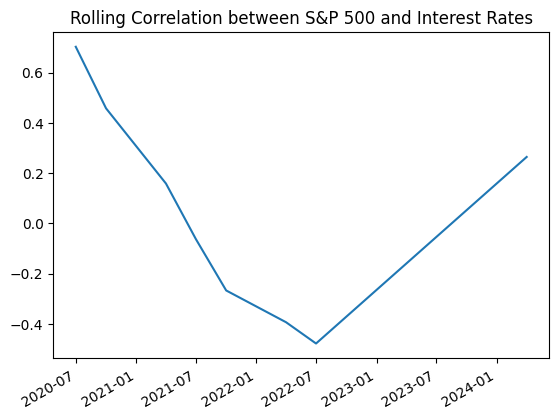

In [61]:
rolling_corr = df_mac_sp['S&P500_x'].rolling(window=12).corr(df_mac_sp['Interest_Rate'])
rolling_corr.plot(title='Rolling Correlation between S&P 500 and Interest Rates')

In [62]:
from statsmodels.tsa.stattools import grangercausalitytests

# Granger causality test to see if interest rates Granger-cause changes in the S&P 500
grangercausalitytests(df_mac_sp[['S&P500_x', 'Interest_Rate',]], maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0563  , p=0.8157  , df_denom=15, df_num=1
ssr based chi2 test:   chi2=0.0675  , p=0.7950  , df=1
likelihood ratio test: chi2=0.0674  , p=0.7952  , df=1
parameter F test:         F=0.0563  , p=0.8157  , df_denom=15, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8824  , p=0.4390  , df_denom=12, df_num=2
ssr based chi2 test:   chi2=2.5000  , p=0.2865  , df=2
likelihood ratio test: chi2=2.3324  , p=0.3115  , df=2
parameter F test:         F=0.8824  , p=0.4390  , df_denom=12, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6505  , p=0.2460  , df_denom=9, df_num=3
ssr based chi2 test:   chi2=8.8028  , p=0.0320  , df=3
likelihood ratio test: chi2=7.0139  , p=0.0715  , df=3
parameter F test:         F=1.6505  , p=0.2460  , df_denom=9, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5738  , p=0.2947  , df_den

{1: ({'ssr_ftest': (0.05625952301027542, 0.8157176829793695, 15.0, 1),
   'ssr_chi2test': (0.0675114276123305, 0.7949952076378801, 1),
   'lrtest': (0.06738513793430911, 0.7951827702682264, 1),
   'params_ftest': (0.05625952301026911, 0.8157176829793803, 15.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.8823510436383964, 0.439022297854879, 12.0, 2),
   'ssr_chi2test': (2.4999946236421233, 0.286505567037386, 2),
   'lrtest': (2.3324143786473712, 0.3115463395171887, 2),
   'params_ftest': (0.8823510436383981, 0.4390222978548787, 12.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.6505175903556668, 0.24602797363297038, 9.0, 3),
   'ssr_chi2test': (8.80276048189689, 0.03203155646548549, 3),
   'lrtest': (7.013859751849452, 0.07145732462133961, 3),
   'params_ftest': (1.65051759035567, 0.2460279736329697, 9.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1

### A VAR Model captures dynamic relationships between macroeconomic variables and stock prices, showing how they interact with each other.

In [63]:
from statsmodels.tsa.api import VAR

# Fit a VAR model
model = VAR(df_mac_sp[['S&P500_x', 'Interest_Rate', 'CPI']])
var_result = model.fit(maxlags=5)
print(var_result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 23, Aug, 2024
Time:                     13:25:19
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -157.278
Nobs:                     14.0000    HQIC:                  -159.672
Log likelihood:           1104.69    FPE:               -1.96674e-69
AIC:                     -159.469    Det(Omega_mle):    -1.99879e-70
--------------------------------------------------------------------
Results for equation S&P500_x
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                  -18.645575              NAN              NAN             NAN
L1.S&P500_x              1.359469              NAN              NAN             NAN
L1.Interest_Rate        59.253025            

C:\Users\blake\Documents\github\finance_time_series\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\blake\Documents\github\finance_time_series\venv\Lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1558: RuntimeWarning:

invalid value encountered in sqrt



### How can we optimize a portfolio to maximize return and minimize risk?

In [62]:
# List of Example stock symbols to include in the portfolio
selected_symbols = ['NVDA']

In [63]:
# Assuming 'Return' and 'Volatility' represent daily returns and risk for each asset
# Filter the necessary columns
# Filter the 'Return' and 'Volatility' columns
returns = df[['Symbol', 'Return']]
volatility = df[['Symbol', 'Volatility']]

In [64]:
# pivot the dataframe so that each column represents a different asset indexed by the date
returns = returns.pivot(columns='Symbol', values='Return')
volatility = volatility.pivot(columns='Symbol', values='Volatility')

In [65]:
# Filter the 'returns' and 'volatility' dataframes to only include the selected stocks
returns_filtered = returns[selected_symbols]
volatility_filtered = volatility[selected_symbols]

In [66]:
returns_filtered

Symbol,NVDA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1854053,NaN
1854054,NaN
1854055,NaN
1854056,NaN


In [67]:
volatility_filtered

Symbol,NVDA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1854053,NaN
1854054,NaN
1854055,NaN
1854056,NaN


In [68]:
# Calculate mean returns and covariance matrix
mean_returns = returns_filtered.mean()
cov_matrix = returns_filtered.cov()

# Number of assets in the portfolio
num_assets = len(mean_returns)

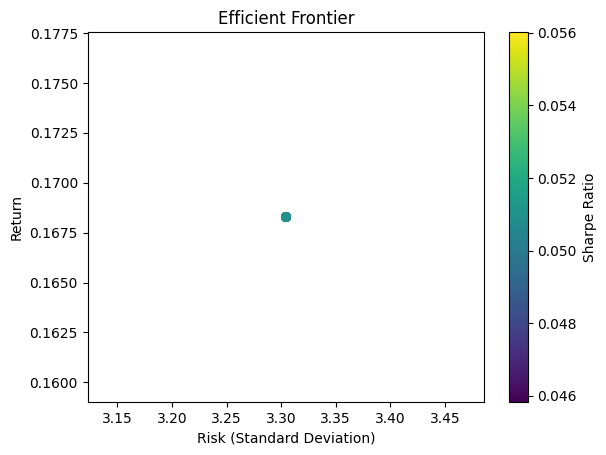

In [69]:
# Number of portfolios to simulate
num_portfolios = 10_000

# Arrays to store results
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    # Generate random portfolio weights
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)  # Normalize weights to sum to 1
    
    # Portfolio return and risk
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Store the results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_std_dev
    results[2, i] = results[0, i] / results[1, i]  # Sharpe Ratio
    
    # Store the weights
    weights_record.append(weights)

# Plotting the efficient frontier
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()

In [70]:
# Get the index of the portfolio with the maximum Sharpe ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_risk = results[1, max_sharpe_idx]
max_sharpe_weights = weights_record[max_sharpe_idx]

print("Max Sharpe Ratio Portfolio:")
print(f"Return: {max_sharpe_return}, Risk: {max_sharpe_risk}")
print("Weights:", max_sharpe_weights)

# Get the index of the portfolio with the minimum risk
min_risk_idx = np.argmin(results[1])
min_risk_return = results[0, min_risk_idx]
min_risk_risk = results[1, min_risk_idx]
min_risk_weights = weights_record[min_risk_idx]

print("Min Risk Portfolio:")
print(f"Return: {min_risk_return}, Risk: {min_risk_risk}")
print("Weights:", min_risk_weights)

Max Sharpe Ratio Portfolio:
Return: 0.1682845269562605, Risk: 3.304512028970848
Weights: [1.]
Min Risk Portfolio:
Return: 0.1682845269562605, Risk: 3.304512028970848
Weights: [1.]


In [ ]:
# Apply the optimal weights to the historical returns
optimal_portfolio_returns = (returns_filtered * max_sharpe_weights).sum(axis=1)

# Calculate cumulative returns
cumulative_returns = (1 + optimal_portfolio_returns).cumprod()

# Plot the cumulative returns of the optimal portfolio
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Optimal Portfolio')
plt.title('Cumulative Returns of the Optimal Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

In [74]:
# Inspect the maximum and minimum values in the returns and volatility dataframes
print(returns_filtered.describe())
print(volatility_filtered.describe())

Symbol         AAPL         MSFT        GOOGL         AMZN
count   3509.000000  3492.000000  3474.000000  3499.000000
mean      22.727907   153.017610    29.461194    38.974919
std      171.124079   429.356369   206.609794   224.964976
min      -98.749300   -96.923430   -98.001557   -98.288451
25%      -63.379717   -29.734001   -54.006239   -62.607325
50%      -34.837158    27.418498   -19.082198   -26.574282
75%       36.304579   168.205950    47.738315    53.060142
max     2179.952379  7826.322930  7072.941147  4454.587481
Symbol          AAPL         MSFT         GOOGL          AMZN
count    1291.000000  1318.000000   1298.000000   1269.000000
mean      447.118441   444.353116    443.799539    449.491231
std       812.019646   538.462506    616.033733    618.993143
min        65.681571    82.018311     74.560704     78.076650
25%       201.410510   201.050743    198.489167    203.711665
50%       290.724515   302.173607    284.150565    292.213205
75%       444.765746   462.487851  

In [75]:
# Check for NaN or infinite values in the data
print(returns_filtered.isnull().sum())
print(np.isfinite(returns_filtered).sum())

Symbol
AAPL     175
MSFT     192
GOOGL    210
AMZN     185
dtype: int64
Symbol
AAPL     3509
MSFT     3492
GOOGL    3474
AMZN     3499
dtype: int64


In [76]:
# Handle missing or infinite values
returns_filtered = returns_filtered.dropna()  # Or use .fillna() as appropriate

### Can machine learning models improve trend prediction?

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
# Assuming 'df' contains the stock prices with 'Date' as the index and 'Close' as the column for stock price
data = df[['Close']]

In [79]:
# Scaling the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and test sets (e.g., 80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [80]:
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Create sequences for training and testing data
time_step = 60
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

# Reshape the data to fit into LSTM/GRU (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# Building the LSTM model
model_lstm = Sequential()

# Add an Input layer as the first layer of the model
model_lstm.add(Input(shape=(time_step, 1)))

# Add the LSTM layers
model_lstm.add(LSTM(25, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(25, return_sequences=False))
model_lstm.add(Dropout(0.2))

# Add Dense layers
model_lstm.add(Dense(25))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
model_lstm.fit(X_train, y_train, batch_size=128, epochs=2)

Epoch 1/2
11582/11582 ━━━━━━━━━━━━━━━━━━━━ 440s 38ms/step - loss: nan
Epoch 2/2
11582/11582 ━━━━━━━━━━━━━━━━━━━━ 460s 40ms/step - loss: nan


In [85]:
from tensorflow.keras.layers import GRU

# Building the GRU model
model_gru = Sequential()

# Add an Input layer as the first layer of the model
model_gru.add(Input(shape=(time_step, 1)))

# Add the GRU layers
model_gru.add(GRU(25, return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(25, return_sequences=False))
model_gru.add(Dropout(0.2))

# Add Dense layers
model_gru.add(Dense(25))
model_gru.add(Dense(1))

# Compile the model
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_gru.fit(X_train, y_train, batch_size=64, epochs=2)

Epoch 1/2
23163/23163 ━━━━━━━━━━━━━━━━━━━━ 918s 39ms/step - loss: nan
Epoch 2/2
23163/23163 ━━━━━━━━━━━━━━━━━━━━ 914s 39ms/step - loss: nan


In [87]:
%store model_lstm
%store model_gru

Stored 'model_lstm' (Sequential)
Stored 'model_gru' (Sequential)


In [90]:
# Predicting stock prices with LSTM
predicted_lstm = model_lstm.predict(X_test)
predicted_lstm = scaler.inverse_transform(predicted_lstm)  # Inverse scaling

11580/11580 ━━━━━━━━━━━━━━━━━━━━ 95s 8ms/step


In [91]:
# Predicting stock prices with GRU
predicted_gru = model_gru.predict(X_test)
predicted_gru = scaler.inverse_transform(predicted_gru)  # Inverse scaling

11580/11580 ━━━━━━━━━━━━━━━━━━━━ 90s 8ms/step


In [92]:
%store predicted_lstm
%store predicted_gru

Stored 'predicted_lstm' (ndarray)
Stored 'predicted_gru' (ndarray)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_model = ARIMA(train_data, order=(5,1,0))
arima_model_fit = arima_model.fit()

# Forecast using ARIMA
forecast_arima = arima_model_fit.forecast(steps=len(test_data))

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for LSTM
mse_lstm = mean_squared_error(y_test, predicted_lstm)

# Calculate MSE for GRU
mse_gru = mean_squared_error(y_test, predicted_gru)

### Can machine learning enhance volatility forecasting accuracy?

In [101]:
df.head()

,S&P500,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Bollinger_Upper,Bollinger_Lower,MACD,MACD_Signal,MACD_Histogram,Log_Return,Volatility,Excess_Return,Sharpe_Ratio,Rescaled_Returns
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,A,20.084953,22.389128,22.625179,22.267525,22.453505,3815561.0,NYQ,"Agilent Technologies, Inc.",...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,COP,23.929371,40.082603,40.158836,39.282173,39.465130,13880848.0,NYQ,ConocoPhillips,...,NaN,NaN,0.306677,0.061335,0.245342,0.175136,NaN,19.140784,NaN,0.019141
2010-01-04,NaN,EXR,7.290416,11.890000,11.910000,11.600000,11.750000,774400.0,NYQ,Extra Space Storage Inc,...,NaN,NaN,-0.783868,-0.107705,-0.676162,-1.188546,NaN,-69.533607,NaN,-0.069534
2010-01-04,NaN,MS,22.652843,30.910000,31.969999,30.629999,30.700001,20371000.0,NYQ,Morgan Stanley,...,NaN,NaN,-0.403857,-0.166936,-0.236922,1.133725,NaN,210.720852,NaN,0.210721
2010-01-04,NaN,HD,20.287861,28.670000,29.150000,28.549999,29.150000,13120900.0,NYQ,"Home Depot, Inc. (The)",...,NaN,NaN,-0.290186,-0.191586,-0.098600,-0.110263,NaN,-10.440114,NaN,-0.010440


In [104]:
# Check for NaN values in the 'Return' column
print(f"Number of NaN values in 'Return': {df['Return'].isna().sum()}")

# Check for infinite values in the 'Return' column
print(f"Number of infinite values in 'Return': {np.isinf(df['Return']).sum()}")

Number of NaN values in 'Return': 182136
Number of infinite values in 'Return': 0


In [105]:
# Impute NaN values with the mean of the 'Return' column
df['Return'].fillna(df['Return'].mean(), inplace=True)

In [106]:
# Verify that the 'Return' column no longer contains NaN or infinite values
print(f"Number of NaN values after cleaning: {df['Return'].isna().sum()}")
print(f"Number of infinite values after cleaning: {np.isinf(df['Return']).sum()}")

Number of NaN values after cleaning: 0
Number of infinite values after cleaning: 0


In [111]:
import arch

# Rescale y by multiplying by 0.1
y_rescaled = 0.1 * df['Return']  # Or adjust the scaling factor as needed

# Fit the GARCH model on the rescaled data
garch_model = arch.arch_model(y_rescaled, vol='Garch', p=1, q=1)
garch_fitted = garch_model.fit(disp="off")

# Forecast volatility using the fitted model
forecasted_volatility_rescaled = garch_fitted.forecast(horizon=10).variance[-1:]

# If needed, revert scaling of the predicted volatility
forecasted_volatility_original = forecasted_volatility_rescaled / 0.1**2

forecasted_volatility_original

                     h.01           h.02          h.03           h.04  \
Date                                                                    
2024-08-22  678390.116273  685031.030218  688351.48719  690011.715676   

                    h.05           h.06           h.07           h.08  \
Date                                                                    
2024-08-22  690841.82992  691256.887041  691464.415602  691568.179882   

                     h.09           h.10  
Date                                      
2024-08-22  691620.062022  691646.003092  


In [112]:
forecasted_volatility_original

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10
Date,,,,,,,,,,
2024-08-22,678390.116273,685031.030218,688351.48719,690011.715676,690841.82992,691256.887041,691464.415602,691568.179882,691620.062022,691646.003092


In [113]:
df['Historical_Volatility'] = df['Return'].rolling(window=20).std()

# Drop NaN values generated by rolling operations
df.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

# Define your features and target (e.g., predict the next day's volatility)
features = ['SMA_20', 'SMA_50', 'Historical_Volatility', 'GARCH_Volatility']
target = 'GARCH_Volatility'

# Shift the target to predict future volatility
df['Future_Volatility'] = df['GARCH_Volatility'].shift(-1)
df.dropna(inplace=True)

# Split the data into train and test sets
X = df[features]
y = df['Future_Volatility']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)